<a href="https://colab.research.google.com/github/joaovrmdev/HeartDisease_ML/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hype** -  Grupo 1D
###Contexto:
As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro em cada cinco mortes por DCV são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.
Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

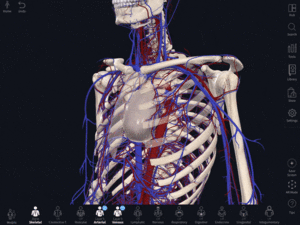




##Dataset 📚 🅰🆎🅱🅾
###fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

##1. Análise exploratoria dos dados 📈

In [2]:
#set-up libraries 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#Read in data
df = pd.read_csv('https://raw.githubusercontent.com/joaovrmdev/HeartDisease_ML/main/heart.csv')

In [14]:
# look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
#Look at some records
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


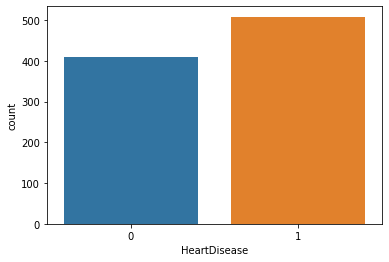

In [16]:
# Look at breakdown of label
df['HeartDisease'].value_counts()
sns.countplot(df['HeartDisease'])

In [17]:
# Look at breakdown of categorical feature(s)
df['Sex'].value_counts() 

M    725
F    193
Name: Sex, dtype: int64

In [18]:
# summarise
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##2. Pré-processamento dos dados ⚙️

In [ ]:
#remove records with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [20]:
#Transform categorical feature(s) to numeric
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.ChestPainType = le.fit_transform(df.ChestPainType)
df.RestingECG = le.fit_transform(df.RestingBP)
df.ExerciseAngina = le.fit_transform(df.ExerciseAngina)
df.ST_Slope = le.fit_transform(df.ST_Slope)

In [21]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,41,172,0,0.0,2,0
1,49,0,2,160,180,0,55,156,0,1.0,1,1
2,37,1,1,130,283,0,31,98,0,0.0,2,0
3,48,0,0,138,214,0,39,108,1,1.5,1,1
4,54,1,2,150,195,0,49,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,14,132,0,1.2,1,1
914,68,1,0,144,193,1,45,141,0,3.4,1,1
915,57,1,0,130,131,0,31,115,1,1.2,1,1
916,57,0,1,130,236,0,31,174,0,0.0,1,1


In [22]:
#Explore correlations to label
df.corr().HeartDisease.sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingECG        0.113658
RestingBP         0.107589
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

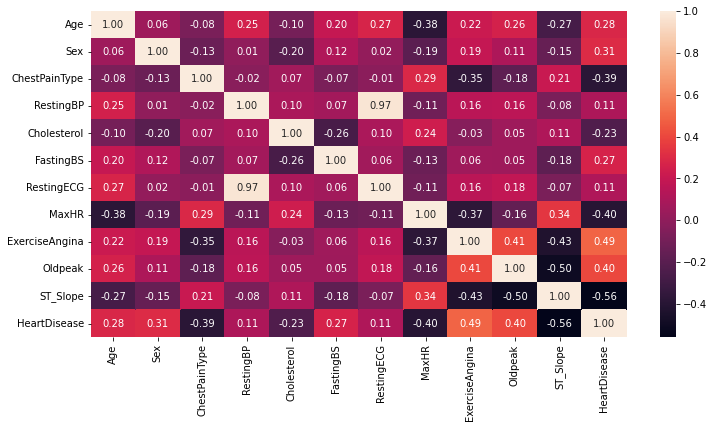

In [23]:
#Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##Treinamento da maquina preditiva 🦾

In [40]:
#Split data into 80% train and 20% validation
X= df.drop('HeartDisease', axis=1)
Y= df['HeartDisease']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=7)

In [53]:
#Build an train the model
model = XGBClassifier(learning_rate=0.3, max_depth=1).fit(X_train, Y_train)
model

XGBClassifier(learning_rate=0.3, max_depth=1)

##Maquina preditiva final 🎰

In [54]:
#Apply model to validation data
Y_predict = model.predict(X_val)

In [55]:
#Compare actual and predicted values
actual_vs_predict=pd.DataFrame({'Gabarito(valor real)': Y_val,
                                'Previsão_Maquina_Predtiva': Y_predict})
actual_vs_predict.sample(12)

,Gabarito(valor real),Previsão_Maquina_Predtiva
571,1,1
455,0,1
621,1,1
318,1,1
831,0,0
644,0,0
418,1,1
159,0,0
60,0,0
804,1,1


###Precisão final da máquina 🎯



In [56]:
#Evaluate model
print('Classification metrics: \n', classification_report(Y_val, Y_predict))
print('Acurácia: \n', accuracy_score(Y_val, Y_predict))
print('Confusion Matrix: \n', confusion_matrix(Y_val, Y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        90
           1       0.87      0.90      0.89        94

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Acurácia: 
 0.8804347826086957
Confusion Matrix: 
 [[77 13]
 [ 9 85]]


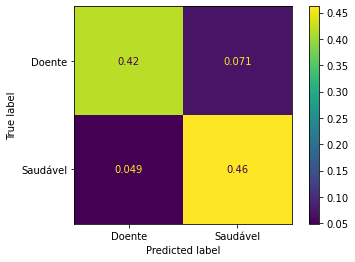

In [57]:
cm = confusion_matrix (Y_val, Y_predict, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Doente', 'Saudável'])
cmd.plot()